In [1]:
import pandas as pd
import numpy as np
import os, random, math
from matplotlib import pyplot
from openalea.vmango.simulation.fruitmodel.fruit_model_main import growth_main
from openalea.vmango.simulation.fruitmodel.fruitmodel import initialize_input
from openalea.vmango.simulation.fruitmodel.fruitmodel_error import FruitModelValueError

In [2]:
path_hourly = '../../share/environment/weather_hourly_stpierre_2002.csv'
path_daily = '../../share/environment/weather_daily_stpierre_2002.csv'
path_sunlit = '../../share/environment/sunlit_fractions.csv'
path_params = '../../share/parameters/fruitmodel/cogshall.toml'

In [3]:
df_input_hourly, df_input_daily, df_sunlit, params = initialize_input(path_hourly, path_daily, path_sunlit, path_params)

In [4]:
bloom_date = '01/11/2002'
nb_fruits = 1
nb_leaves_treatments = [5, 10, 25, 50, 100, 150]

DM_fruit_0 = 0.97 * np.random.normal(13.9, 4.1) + 0.03 * np.random.normal(29.2, 0.66)
sunlit_bs = df_sunlit.iloc[:,random.randrange(0, 5)].to_numpy() 

In [5]:
dfs = []
for i, nb_leaves in enumerate(nb_leaves_treatments):
    df = None
    try:
        df = growth_main(
            bloom_date,
            nb_fruits,
            nb_leaves,
            sunlit_bs,
            df_input_daily,
            df_input_hourly,
            params,
            DM_fruit_0,
            DM_fruit_ini=np.nan,
            sim_date_ini=None,
            dd_thresh=np.nan,
            stop_sim_ddcum=np.nan,
            verbose=False
        )
    except FruitModelValueError as e:
        print(i, nb_leaves, e)
    finally:
        dfs.append(df)
        if df is not None:
            display(df.head())


11.058058574162036


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-03,104.466811,11.058059,83.396525,9.203895,74.714947,7.571124,0.119910,2.615529,-0.678681,...,0.003077,0.004815,0.007024,0.014916,0.007019,0.017544,360.05,5.0,0.486537,63.0
1,2002-11-04,117.670568,11.248338,96.014959,9.358523,86.019802,7.698321,0.643067,2.048034,-0.591566,...,0.002877,0.004253,0.006327,0.013458,0.006585,0.015574,368.55,5.0,0.486537,64.0
2,2002-11-05,132.054998,11.405201,108.768683,9.485994,97.445863,7.803179,0.643067,2.004309,-0.478800,...,0.002735,0.003796,0.005768,0.012299,0.006223,0.013968,377.75,5.0,0.486537,65.0
3,2002-11-06,148.784980,11.477148,123.691844,9.544460,110.815523,7.851272,0.643067,1.961293,-0.432336,...,0.002566,0.003356,0.005197,0.011118,0.005743,0.012391,386.10,5.0,0.486537,66.0
4,2002-11-07,163.755969,11.585261,137.010455,9.632304,122.747667,7.923533,0.643067,1.918974,-0.445537,...,0.002451,0.003047,0.004803,0.010302,0.005441,0.011295,393.80,5.0,0.486537,67.0


11.058058574162036


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-03,104.466811,11.058059,83.396525,9.203895,74.714947,7.571124,0.239819,2.615529,-0.674639,...,0.003077,0.004815,0.007024,0.014916,0.007019,0.017544,360.05,10.0,0.486537,63.0
1,2002-11-04,117.716520,11.500784,95.851004,9.563628,85.872915,7.867041,1.286135,1.522909,-0.597216,...,0.002884,0.004335,0.006449,0.013668,0.006893,0.015919,368.55,10.0,0.486537,64.0
2,2002-11-05,132.597721,11.892983,108.858391,9.882292,97.526232,8.129173,1.286135,1.477146,-0.490486,...,0.002742,0.003922,0.005959,0.012623,0.006746,0.014509,377.75,10.0,0.486537,65.0
3,2002-11-06,150.159026,12.131809,124.390432,10.076324,111.441388,8.288784,1.286135,1.432123,-0.444644,...,0.002571,0.003489,0.005405,0.011466,0.006351,0.012981,386.10,10.0,0.486537,66.0
4,2002-11-07,166.124515,12.424999,138.449304,10.314478,124.036731,8.484689,1.286135,1.387830,-0.457910,...,0.002455,0.003192,0.005033,0.010680,0.006144,0.011944,393.80,10.0,0.486537,67.0


11.058058574162036


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-03,104.466811,11.058059,83.396525,9.203895,74.714947,7.571124,0.599548,2.615529,-0.670122,...,0.003077,0.004815,0.007024,0.014916,0.007019,0.017544,360.05,25.0,0.486537,63.0
1,2002-11-04,117.767863,11.782911,95.667813,9.792797,85.708793,8.055555,2.573158,0.589715,-0.602125,...,0.002889,0.004426,0.006584,0.013899,0.007245,0.016306,368.55,25.0,0.486537,64.0
2,2002-11-05,133.224298,12.536696,108.896645,10.405135,97.560505,8.559264,0.580162,2.530958,-0.505060,...,0.002742,0.004086,0.006209,0.013037,0.007469,0.015229,377.75,25.0,0.486537,65.0
3,2002-11-06,151.905774,13.075572,125.188124,10.842837,112.156040,8.919317,2.489957,0.570647,-0.461835,...,0.002561,0.003680,0.005702,0.011943,0.007282,0.013838,386.10,25.0,0.486537,66.0
4,2002-11-07,169.330948,13.703235,140.282604,11.352525,125.679185,9.338587,0.561403,2.449121,-0.476980,...,0.002434,0.003407,0.005374,0.011214,0.007295,0.012933,393.80,25.0,0.486537,67.0


11.058058574162036


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-03,104.466811,11.058059,83.396525,9.203895,74.714947,7.571124,1.199096,2.615529,-0.669842,...,0.003077,0.004815,0.007024,0.014916,0.007019,0.017544,360.05,50.0,0.486537,63.0
1,2002-11-04,117.771053,11.800440,95.656432,9.807035,85.698597,8.067267,2.605049,1.199096,-0.600832,...,0.002889,0.004432,0.006592,0.013913,0.007267,0.016330,368.55,50.0,0.486537,64.0
2,2002-11-05,133.285052,12.687863,108.828297,10.527888,97.499271,8.660241,1.179671,2.577969,-0.507376,...,0.002741,0.004127,0.006271,0.013139,0.007648,0.015407,377.75,50.0,0.486537,65.0
3,2002-11-06,152.260281,13.405808,125.237427,11.110993,112.200211,9.139903,2.536206,1.160324,-0.467549,...,0.002556,0.003751,0.005812,0.012119,0.007633,0.014158,386.10,50.0,0.486537,66.0
4,2002-11-07,170.237572,14.235009,140.662720,11.784286,126.019731,9.693754,1.141527,2.494612,-0.486447,...,0.002420,0.003500,0.005522,0.011442,0.007815,0.013368,393.80,50.0,0.486537,67.0


11.058058574162036


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-03,104.466811,11.058059,83.396525,9.203895,74.714947,7.571124,2.398192,2.615529,-0.669842,...,0.003077,0.004815,0.007024,0.014916,0.007019,0.017544,360.05,100.0,0.486537,63.0
1,2002-11-04,117.771053,11.800440,95.656432,9.807035,85.698597,8.067267,2.593042,2.398192,-0.600832,...,0.002889,0.004432,0.006592,0.013913,0.007267,0.016330,368.55,100.0,0.486537,64.0
2,2002-11-05,133.285052,12.687863,108.828297,10.527888,97.499271,8.660241,2.359341,2.586907,-0.506554,...,0.002741,0.004127,0.006271,0.013139,0.007648,0.015407,377.75,100.0,0.486537,65.0
3,2002-11-06,152.273447,13.469373,125.197609,11.162602,112.164538,9.182356,2.544999,2.320648,-0.468254,...,0.002556,0.003766,0.005835,0.012157,0.007704,0.014224,386.10,100.0,0.486537,66.0
4,2002-11-07,170.373101,14.385929,140.661560,11.906813,126.018691,9.794544,2.283054,2.503261,-0.489657,...,0.002417,0.003529,0.005567,0.011513,0.007972,0.013501,393.80,100.0,0.486537,67.0


11.058058574162036


,DATE,FM_fruit,DM_fruit,W_fleshpeel,DM_fleshpeel,W_flesh,DM_flesh,reserve_leaf,reserve_stem,water_potential,...,sucrose,glucose,fructose,soluble_sugars,starch,organic_acids,dd_cum,LF,sunlit_bs,DAB
0,2002-11-03,104.466811,11.058059,83.396525,9.203895,74.714947,7.571124,3.597288,2.615529,-0.669842,...,0.003077,0.004815,0.007024,0.014916,0.007019,0.017544,360.05,150.0,0.486537,63.0
1,2002-11-04,117.771053,11.800440,95.656432,9.807035,85.698597,8.067267,2.573158,3.568910,-0.600832,...,0.002889,0.004432,0.006592,0.013913,0.007267,0.016330,368.55,150.0,0.486537,64.0
2,2002-11-05,133.285052,12.687863,108.828297,10.527888,97.499271,8.660241,3.511093,2.541527,-0.507314,...,0.002741,0.004127,0.006271,0.013139,0.007648,0.015407,377.75,150.0,0.486537,65.0
3,2002-11-06,152.261280,13.410632,125.234405,11.114909,112.197504,9.143124,2.500354,3.453511,-0.467114,...,0.002556,0.003752,0.005814,0.012122,0.007638,0.014163,386.10,150.0,0.486537,66.0
4,2002-11-07,170.257108,14.288757,140.636580,11.827921,125.996312,9.729647,3.397564,2.459348,-0.487670,...,0.002420,0.003511,0.005539,0.011470,0.007872,0.013418,393.80,150.0,0.486537,67.0


### Lechaudel 2007, p. 226, fruit fresh matter vs days after bloom

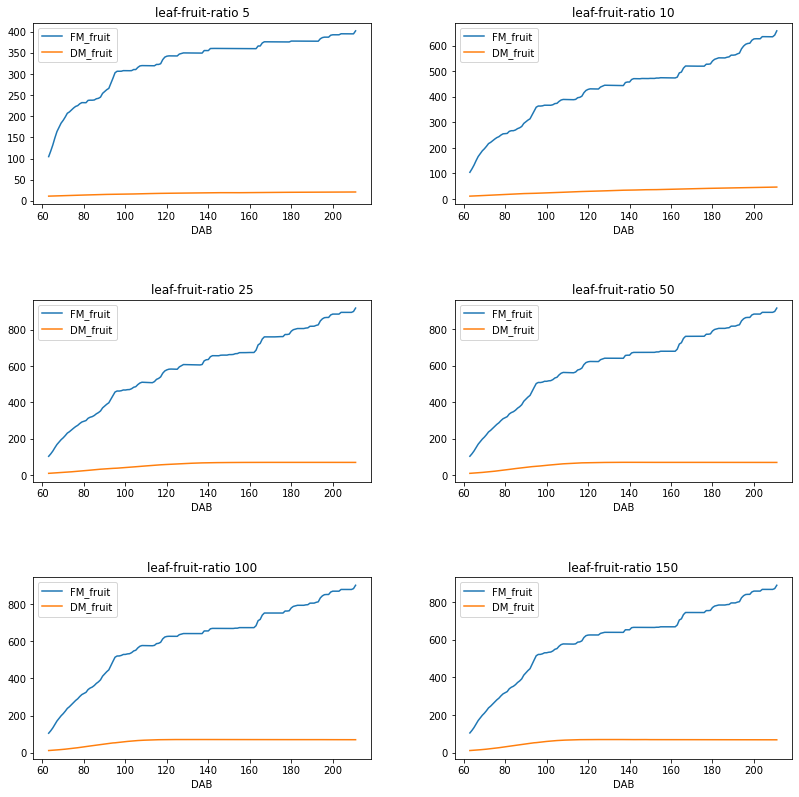

In [6]:
fig_1, axs_1 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_1 = axs_1.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'FM_fruit', 'DM_fruit']].plot(
            x=0, y=[1, 2], title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_1[i], figsize=(12,12))

### Lechaudel 2005, p. 589, stem and leaf reserves vs days after bloom

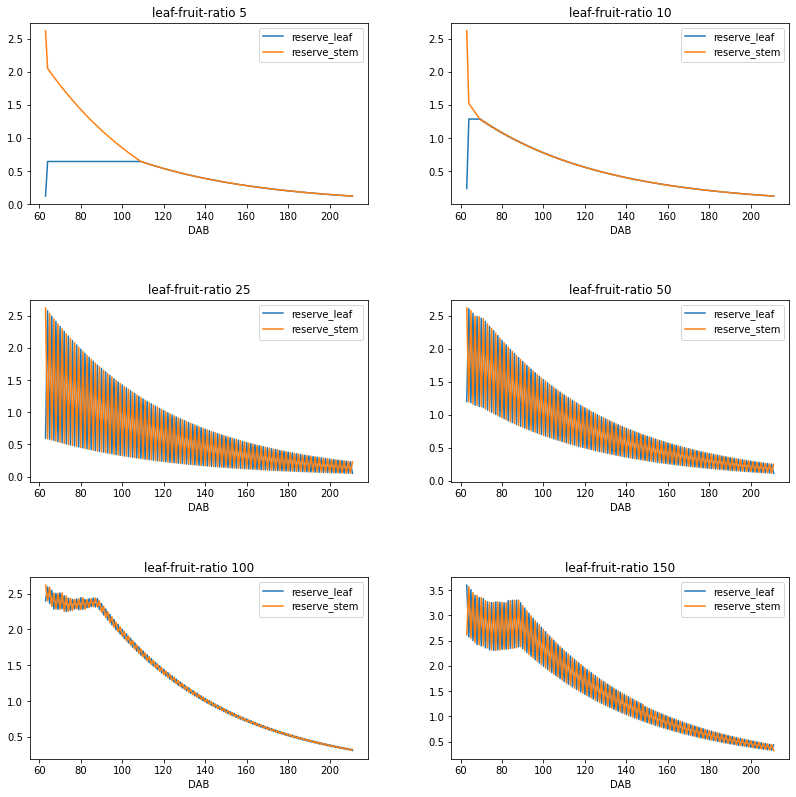

In [7]:
fig_2, axs_2 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_2 = axs_2.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['DAB', 'reserve_leaf', 'reserve_stem']].plot(
            x=0, y=[1, 2], title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_2[i], figsize=(12,12))

### Lechaudel 2005, p. 590, fruit dry matter vs degree days

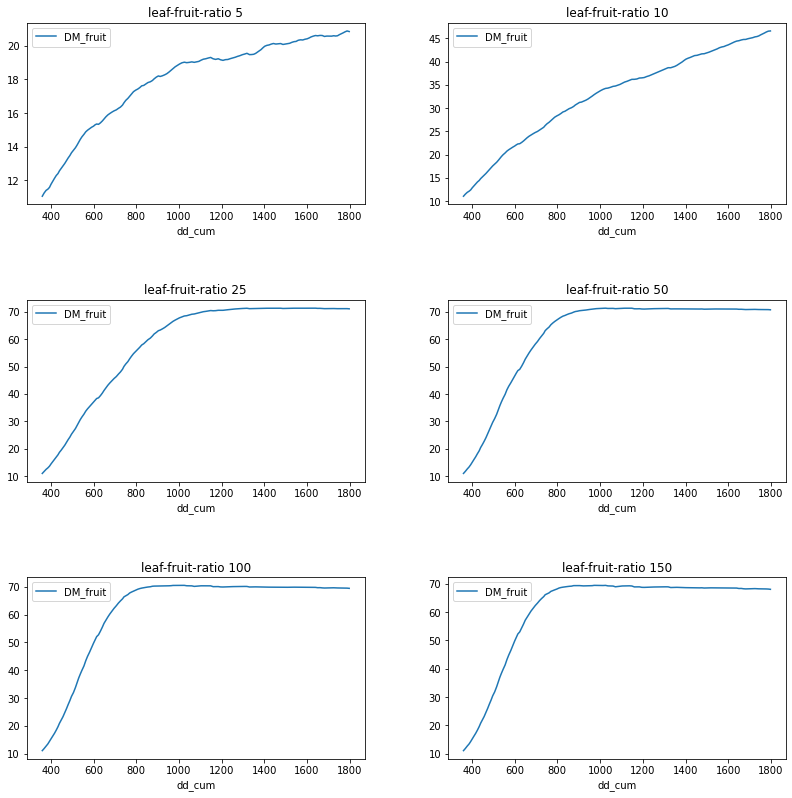

In [8]:
fig_3, axs_3 = pyplot.subplots(math.ceil(len(nb_leaves_treatments) / 2), 2)
axs_3 = axs_3.flatten()
pyplot.tight_layout()

for i, df in enumerate(dfs):
    if df is not None:
        df[['dd_cum', 'DM_fruit']].plot(
            x=0, y=1, title=f'leaf-fruit-ratio {nb_leaves_treatments[i]}', ax=axs_3[i], figsize=(12,12))